In [1]:
# 数値計算ライブラリと描画ライブラリのインポート
# グラフをこのページに表示させるための設定
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 問題
外見上はまったく区別がつかない 6 種の設定のスロット ω0, ω1, ω2, ω3, ω4, ω5 が大量に設置されており，その台数比率はそれぞれ，π0, π1, π2, π3, π4, π5 とする．また，これら 6 種のスロットを回して当たりの出る確率はそれぞれ，θ0, θ1, θ2, θ3, θ4, θ5 とする．この中からスロットを無作為に 1 台選び，そのスロットを続けて n(≧2) 回遊んだところ，観測結果 x1x2...xt...xn が得られ，その内容は r 回 (0 ≦ r ≦ n)当たりだったとする．ただし，xt は t 回目の観測結果を表す．この結果より，そのスロットの設定が ω0, ω1, ω2, ω3, ω4, ω5 である確率をそれぞれ求めよ．

In [2]:
pi = np.array([0.4 , 0.27, 0.18, 0.1 , 0.04, 0.01])  # 台数比率
th = np.array([0.4, 0.44, 0.48, 0.52, 0.56, 0.6])  # 当たり確率
n = 50  # 遊んだ回数
r = 30  # 当たった回数

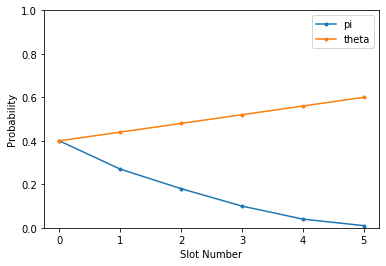

In [3]:
plt.plot(pi, '.-', label='pi')
plt.plot(th, '.-', label='theta')
plt.ylim(0, 1)
plt.xlabel('Slot Number')
plt.ylabel('Probability')
plt.legend()
plt.show()

各設定ωiのスロットで，ある n 回分の結果xが得られる確率 P(x|ωi) は当たり(確率 th )が r 回，はずれ(確率 1-th )が n-r 回独立に起こる確率なので

In [4]:
P_x_omg = th**r * (1-th)**(n-r)  # 各設定である n 回分の結果が得られる確率
print(P_x_omg)

[4.21526369e-17 1.85072050e-16 5.71878796e-16 1.27328334e-15
 2.06392704e-15 2.43073345e-15]


スロットの設定に関わらず，ある n 回分の結果xが得られる確率 P(x) は上式を全設定について比率を考慮して足した確率なので

In [5]:
P_x = np.sum(pi * th**r * (1-th)**(n-r))  # 各設定である n 回分の結果が得られる確率
print(P_x)

4.0396144130367607e-16


ベイズの定理より，ある結果xが得られたときのスロットが設定 ω0 ~ ω5 である確率 P(ωi|x) をそれぞれ算出すると

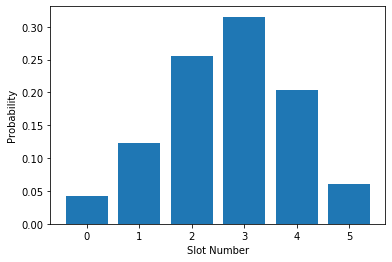

In [6]:
P_omg_x = pi * P_x_omg / P_x

plt.bar(range(6), P_omg_x)
plt.xlabel('Slot Number')
plt.ylabel('Probability')
plt.show()

ベイズ推定では，50回遊んで30回当たると，そのスロットの設定は ω3 である確率が最も高いという結果になる．最尤推定では当たり確率が 0.6 であるスロットは ω5 と予測されるが，台数比率が考慮されていないため，実態と合わない．1000回遊んで，600回当たれば ω5 が正解かも知れないが，試行回数 50 回は最尤推定の結果が信用できる回数ではない．ベイズ推定が強みを発揮するのは試行回数が少ない場合や事前分布(この問題では台数比率のこと)がある程度分かっている場合．事前分布は厳密でなくていいが，一様分布にすると無情報事前分布となり，結果が最尤推定と同じになってしまう．